In [ ]:
import requests

# The Google Sheet ID from your previous request
file_id = '14QQu_ORrTXG6rNTt4jV23VZ8ZGXJCDDwlajutac3DGs'
download_url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'

# Define the local filename
local_filename = 'Experiments.xlsx'

# Download the file
response = requests.get(download_url)
response.raise_for_status() # Raise an exception for bad status codes

# Save the file locally
with open(local_filename, 'wb') as f:
    f.write(response.content)

print(f"'{local_filename}' has been downloaded to the Colab environment.")

'Experiments.xlsx' has been downloaded to the Colab environment.


Once Google Drive is mounted, please provide the full path to your `Experiments.xlsx` file. For example, if it's in the root of 'My Drive', the path might be `/content/drive/My Drive/Experiments.xlsx`. If it's in a subfolder, it would be `/content/drive/My Drive/your_folder/Experiments.xlsx`.

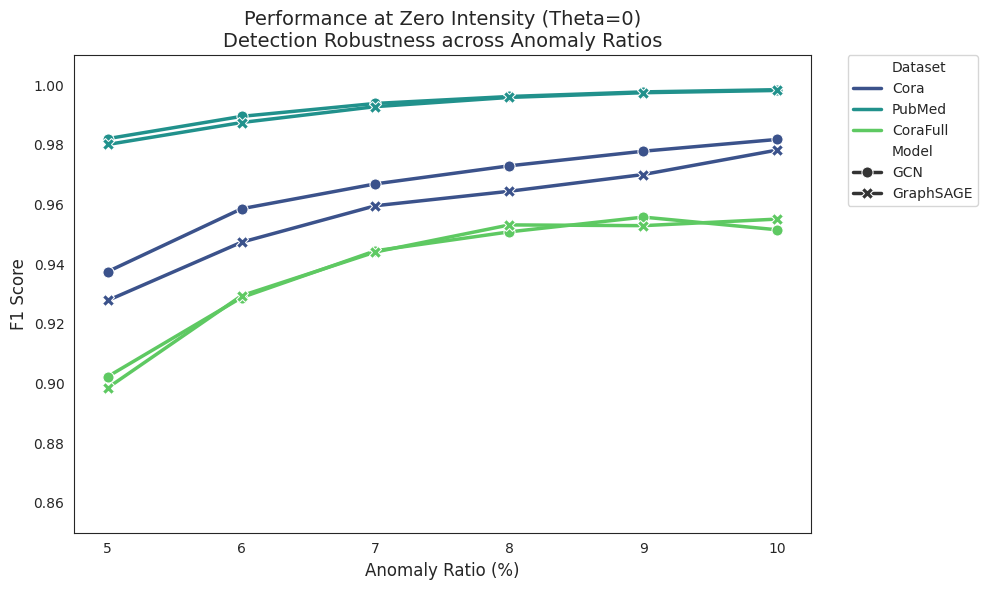

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the Excel file (Keeping your filename)
df = pd.read_excel('Experiments.xlsx', header=None)

data_rows = []

# 2. Parse the file
# We iterate through all rows looking for the specific format "Dataset Model" (e.g., "Cora GCN")
for index, row in df.iterrows():
    val0 = str(row[0])

    # logic: The "Varying Anomaly Percentage" experiments are stored in rows
    # where the first column contains both the Dataset name AND the Model name.
    if ' GCN' in val0 or ' GraphSAGE' in val0:
        try:
            # Column 1 is Anomaly Percentage
            anomaly_pct = float(row[1])

            # Filter for the relevant range (5% to 10%)
            if 0.05 <= anomaly_pct <= 0.10:
                dataset_model = val0
                tp = float(row[5])
                fp = float(row[4])
                fn = float(row[6])

                # Calculate Metrics
                precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

                # Split "Cora GCN" -> Dataset="Cora", Model="GCN"
                parts = dataset_model.rsplit(' ', 1)
                dataset = parts[0]
                model = parts[1]

                data_rows.append({
                    'Dataset': dataset,
                    'Model': model,
                    'Anomaly_Pct': anomaly_pct * 100, # Convert to % for X-axis
                    'F1_Score': f1
                })
        except (ValueError, TypeError):
            continue

df_plot = pd.DataFrame(data_rows)

# 3. Create the plot
plt.figure(figsize=(10, 6))

# --- FIX: REMOVE SQUARES/GRID ---
sns.set_style("white") # Removes the grey grid background
plt.grid(False)        # explicitly turns off the grid lines

# Plot F1 Score
sns.lineplot(
    data=df_plot,
    x="Anomaly_Pct",
    y="F1_Score",
    hue="Dataset",
    style="Model",
    markers=True,
    dashes=False,
    palette="viridis",
    linewidth=2.5,
    markersize=8
)

# 4. Customize Labels
plt.title('Performance at Zero Intensity (Theta=0)\nDetection Robustness across Anomaly Ratios', fontsize=14)
plt.ylabel('F1 Score', fontsize=12)
plt.xlabel('Anomaly Ratio (%)', fontsize=12)
plt.ylim(0.85, 1.01) # Focus on high-performance area

# Move legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()